# Wrangle and Analyze WeRateDogs Data
 

Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document my wrangling efforts here, plus showcase them through analyses and visualizations using Python (and its libraries).

In [1]:
# import required libraries
import pandas as pd 
import numpy as np
import os
import requests
import tweepy
from tweepy import OAuthHandler
import json
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering Data

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.</b>

The WeRateDogs Twitter archive contains basic tweet data for 2356 of their tweets. the archive contain rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) .

In [2]:
twitter_archive= pd.read_csv('Data/twitter-archive-enhanced.csv')

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. 

In [3]:
folder_name = 'Data'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
#programmatically downolad image_predictions.tsv file using the Requests library
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r= requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as f:
    f.write(r.content)
    
image_predictions= pd.read_table('Data/image-predictions.tsv',sep='\t')


In [4]:
""" Authorize user to the API using OAuth """
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [5]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
test=[]

tweet_ids= list(twitter_archive.tweet_id)
# Save each tweet's returned JSON as a new line in a .txt file
with open('Data/tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            x={'tweet_id':tweet.id,'retweet_count':tweet.retweet_count,
                                            'favorite_count':tweet.favorite_count}

            test.append(x)
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail", e)
            pass



Fail [{'code': 144, 'message': 'No status found with that ID.'}]
Fail [{'code': 144, 'message': 'No status found with that ID.'}]
Fail [{'code': 144, 'message': 'No status found with that ID.'}]
Fail [{'code': 144, 'message': 'No status found with that ID.'}]
Fail [{'code': 144, 'message': 'No status found with that ID.'}]
Fail [{'code': 144, 'message': 'No status found with that ID.'}]
Fail [{'code': 144, 'message': 'No status found with that ID.'}]
Fail [{'code': 144, 'message': 'No status found with that ID.'}]
Fail [{'code': 144, 'message': 'No status found with that ID.'}]
Fail [{'code': 144, 'message': 'No status found with that ID.'}]
Fail [{'code': 144, 'message': 'No status found with that ID.'}]
Fail [{'code': 144, 'message': 'No status found with that ID.'}]
Fail [{'code': 144, 'message': 'No status found with that ID.'}]
Fail [{'code': 144, 'message': 'No status found with that ID.'}]
Fail [{'code': 144, 'message': 'No status found with that ID.'}]
Fail [{'code': 144, 'mess

In [6]:
'''This code produce this error ValueError: Expected object or value, so I used dictionary '''
#df_json = pd.read_json(
#    'Data/tweet-json.txt', lines=True)[['id', 'retweet_count', 'favorite_count']]
#df_json.rename(columns={'id': 'tweet_id'}, inplace=True)

'This code produce this error ValueError: Expected object or value, so I used dictionary '

In [7]:
# Convert dictionary into dataframe
df_json= pd.DataFrame(test)
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
tweet_id          2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


## Assessing Data
Assessing data is the second step in data wrangling.
When assessing, inspecting the dataset for two things: data quality issues (i.e. content issues) and lack of tidiness (i.e. structural issues).

### Assessing twitter_archive

In [8]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2016,672169685991993344,NaN,NaN,2015-12-02 21:45:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradley. That is his sandwich. He carr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672169685...,10,10,Bradley,None,None,None,None
2216,668537837512433665,NaN,NaN,2015-11-22 21:13:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spark. He's nervous. Other dog hasn't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668537837...,8,10,Spark,None,None,None,None
1972,673240798075449344,NaN,NaN,2015-12-05 20:41:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Magical floating dog here. Very calm. Always h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673240798...,6,10,None,None,None,None,None
786,774757898236878852,NaN,NaN,2016-09-10 23:54:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finley. She's a Beneboop Cumbersplash....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/774757898...,12,10,Finley,None,None,None,None
790,773922284943896577,NaN,NaN,2016-09-08 16:33:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Heinrich (pronounced ""Pat""). He's a Bo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/773922284...,12,10,Heinrich,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2019,672125275208069120,NaN,NaN,2015-12-02 18:48:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just impressive I have nothing else to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672125275...,11,10,just,None,None,None,None
1744,679158373988876288,NaN,NaN,2015-12-22 04:35:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rubio. He has too much skin. 11/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None
1553,688908934925697024,NaN,NaN,2016-01-18 02:21:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clarence. He does parkour. 8/10 very tale...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688908934...,8,10,Clarence,None,None,None,None
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,None,None,None


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# duplicated function return boolean Series denoting duplicate rows
sum(twitter_archive.duplicated())

0

In [12]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [13]:
twitter_archive.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [14]:
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

### Assessing image_predictions

In [15]:
# Random 20 rows
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1526,788765914992902144,https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg,1,cocker_spaniel,0.500509,True,golden_retriever,0.272734,True,jigsaw_puzzle,0.041476,False
1745,822975315408461824,https://pbs.twimg.com/media/C2vLrpvWIAA3LM3.jpg,1,bathtub,0.331098,False,tub,0.248860,False,Pembroke,0.233162,True
239,670435821946826752,https://pbs.twimg.com/media/CU3d0azWUAA38FD.jpg,1,sorrel,0.460370,False,basenji,0.135767,True,Cardigan,0.099174,True
1765,826598365270007810,https://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg,1,French_bulldog,0.628119,True,Siamese_cat,0.117397,False,cougar,0.082765,False
1135,728751179681943552,https://pbs.twimg.com/media/Ch0LVPdW0AEdHgU.jpg,1,Saint_Bernard,0.482050,True,collie,0.202740,True,borzoi,0.037976,True
948,704819833553219584,https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg,1,guinea_pig,0.994776,False,hamster,0.004069,False,wood_rabbit,0.000206,False
1099,720415127506415616,https://pbs.twimg.com/media/Cf9tuHUWsAAHSrV.jpg,1,Rottweiler,0.990312,True,black-and-tan_coonhound,0.002495,True,American_black_bear,0.001733,False
1759,825829644528148480,https://pbs.twimg.com/media/C3XvqILXUAU2nnT.jpg,2,Great_Pyrenees,0.853407,True,golden_retriever,0.053531,True,English_setter,0.045830,True
1077,717537687239008257,https://pbs.twimg.com/media/CfU0t75W4AAUo9V.jpg,1,golden_retriever,0.779356,True,Labrador_retriever,0.052511,True,kuvasz,0.049811,True
747,687704180304273409,https://pbs.twimg.com/media/CYs3TKzUAAAF9A2.jpg,1,miniature_pinscher,0.956063,True,toy_terrier,0.012231,True,Chihuahua,0.005397,True


In [16]:
sum(image_predictions.duplicated())

0

In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
image_predictions.img_num.unique()

array([1, 4, 2, 3])

In [20]:
sum(image_predictions.jpg_url.duplicated()==True)

66

### Assessing Twitter Json Dataframe

In [21]:
df_json.sample(20)

,favorite_count,retweet_count,tweet_id
1224,3064,950,712092745624633345
591,0,2158,798628517273620480
2037,771,236,671485057807351808
1648,1858,193,682808988178739200
909,7744,3119,755955933503782912
1722,2765,770,679527802031484928
634,6607,1869,793150605191548928
1323,2269,640,705066031337840642
1457,1815,393,693942351086120961
1341,3965,1458,703425003149250560


In [22]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
tweet_id          2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [23]:
df_json.describe()

,favorite_count,retweet_count,tweet_id
count,2340.000000,2340.000000,2.340000e+03
mean,7953.964957,2926.254274,7.422176e+17
std,12319.684912,4929.520225,6.832564e+16
min,0.000000,0.000000,6.660209e+17
25%,1370.000000,587.000000,6.783394e+17
50%,3458.000000,1366.500000,7.186224e+17
75%,9732.250000,3409.250000,7.986954e+17
max,164124.000000,83548.000000,8.924206e+17


In [24]:
sum(df_json.duplicated()==True)

0

## Quality Issues (content issues) 

Twitter archive dataframe file:
1. The type of timestamp and tweet_id columns  are not correct, timestamp is string should be converted to date and tweet_id  is int64 should be converted to string
2. Source column contains the link of the tweet source , extract only the text (name of the source) from the link.
3. name column contains faulty names should be replaced with none value***
4. Delete retweeted tweets rows becuase they are not origanal tweet
5. rating_denominator column not only contains 10 

Image predictions file:
6. p1 and p2 columns are string contain (- and _) rather than white spaces between words  
7. Captllize the first letter of p1,p2 and p3 columns values.
8. tweet_id column type is int64 should be converted to string


## Tidiness issues (structural issues)
Twitter archive dataframe file:
1. Remove all columns related to retweeted tweets also remove unwanted columns that will not provide usefual information in the analysis of the project
2. The dataframe contains seperated columns for each dog stage ['doggo', 'floofer', 'pupper', 'puppo'], melt these multiple columns into one column called stage.
3. Merge the above three dataframes into one.

## Cleaning Data
Cleaning your data is the third step in data wrangling. It is where you fix the quality and tidiness issues that you identified in the assess step.

In [111]:
'''in Pandas, indexing a DataFrame returns a reference to the initial DataFrame. 
Thus, changing the subset will change the initial DataFrame.
Thus, you'd want to use the copy if you want to make sure the initial DataFrame shouldn't change 
https://stackoverflow.com/a/27680109/10921301'''
clean_t_arch =twitter_archive.copy()
clean_img_pred= image_predictions.copy()
clean_df_json= df_json.copy()

## Quality Issues

### Define
1. convert tweet_id column from int64 to string

### Code

In [112]:
clean_t_arch.tweet_id= clean_t_arch.tweet_id.astype(str)
clean_img_pred.tweet_id= clean_img_pred.tweet_id.astype(str)
clean_df_json.tweet_id= clean_df_json.tweet_id.astype(str)

### Test

In [113]:
twitter_archive.tweet_id.dtype.name

'int64'

In [114]:
clean_t_arch.tweet_id.dtype.name

'object'

### Define
Source column contains the link of the tweet source , extract only the text (name of the source) from the link

### Code

In [115]:
#https://stackoverflow.com/a/44000505/10921301
clean_t_arch.source= clean_t_arch.source.str.extract(r'>\s*([^\.]*)\s*\<', expand=False)

### Test

In [116]:
clean_t_arch.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Define

Replace all faulty names to none 

### Code

In [117]:
clean_t_arch[clean_t_arch.name.str.islower()==True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [118]:
faulty_names= ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
              'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
              'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
              'officially', 'life', 'light', 'space']

In [119]:
for x in faulty_names:
    clean_t_arch.name.replace(x, 'None',inplace=True)

### Test

In [120]:
clean_t_arch[clean_t_arch.name.str.islower()==True]['name'].unique()

array([], dtype=object)

In [121]:
clean_t_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
       'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Quinn', 'Belle', 'Zooe

### Define

Convert timestamp columns to date 

### Code

In [122]:
clean_t_arch['timestamp']= pd.to_datetime(clean_t_arch['timestamp'])
clean_t_arch['retweeted_status_timestamp']= pd.to_datetime(clean_t_arch['retweeted_status_timestamp'])

### Test

In [123]:
clean_t_arch.timestamp.dtype.name , clean_t_arch.retweeted_status_timestamp.dtype.name

('datetime64[ns]', 'datetime64[ns]')

In [124]:
clean_t_arch.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1480,693486665285931008,NaN,NaN,2016-01-30 17:31:20,Twitter for iPhone,This is Lincoln. He doesn't understand his new...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/693486665...,11,10,Lincoln,None,None,None,None
2170,669351434509529089,NaN,NaN,2015-11-25 03:06:32,Twitter for iPhone,This is Sully. He's a Leviticus Galapagos. Ver...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/669351434...,10,10,Sully,None,None,None,None
2029,671855973984772097,NaN,NaN,2015-12-02 00:58:41,Twitter for iPhone,Remarkable dog here. Walks on back legs really...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/671855973...,8,10,None,None,None,None,None


### Define
Assign 10 to rating_denominator column values

### Code

In [125]:
clean_t_arch.rating_denominator= clean_t_arch['rating_denominator']=10

### Test

In [126]:
clean_t_arch.rating_denominator.unique()

array([10])

### Define
p1 and p2 columns are string contain (- and _) rather than white spaces between words

### Code

In [127]:
clean_img_pred.p1= clean_img_pred.p1.str.capitalize()
clean_img_pred.p2= clean_img_pred.p2.str.capitalize()
clean_img_pred.p3= clean_img_pred.p3.str.capitalize()

### Test

In [128]:
clean_img_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


### Define
Replace _ and - with white space in p1,p2 and p3 column

### Code

In [129]:
clean_img_pred.p1= clean_img_pred.p1.str.replace('_',' ')
clean_img_pred.p2= clean_img_pred.p2.str.replace('_',' ')
clean_img_pred.p3= clean_img_pred.p3.str.replace('_',' ')

clean_img_pred.p1= clean_img_pred.p1.str.replace('-',' ')
clean_img_pred.p2= clean_img_pred.p2.str.replace('-',' ')
clean_img_pred.p3= clean_img_pred.p3.str.replace('-',' ')

### Test

In [130]:
clean_img_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1123,727175381690781696,https://pbs.twimg.com/media/ChdyJvdWwAA5HGd.jpg,2,Flat coated retriever,0.656463,True,Great dane,0.084766,True,Labrador retriever,0.058909,True
1316,755110668769038337,https://pbs.twimg.com/ext_tw_video_thumb/75511...,1,Labrador retriever,0.708974,True,Golden retriever,0.114314,True,Great pyrenees,0.065813,True
642,681339448655802368,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,1,Seat belt,0.532441,False,Labrador retriever,0.094615,True,Kuvasz,0.089863,True
751,688064179421470721,https://pbs.twimg.com/media/CYx-tGaUoAAEXV8.jpg,1,Eskimo dog,0.240602,True,Norwegian elkhound,0.180369,True,Siberian husky,0.090739,True
1030,711306686208872448,https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg,1,Leatherback turtle,0.280835,False,Loggerhead,0.123290,False,Dandie dinmont,0.086792,True
1831,836380477523124226,https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg,1,Wooden spoon,0.082489,False,Sliding door,0.061017,False,Grand piano,0.055086,False
1394,767500508068192258,https://pbs.twimg.com/media/Cqa1ofnXEAAG0yn.jpg,1,Chow,0.483228,True,Golden retriever,0.165063,True,Norfolk terrier,0.060173,True
1827,835297930240217089,https://pbs.twimg.com/media/C5eTCOVUsAAWhvc.jpg,1,Rottweiler,0.341276,True,Border terrier,0.336220,True,Gordon setter,0.045448,True
1871,844973813909606400,https://pbs.twimg.com/media/C7nzMwTV4AARz4t.jpg,1,Labrador retriever,0.742421,True,Golden retriever,0.195218,True,Chihuahua,0.017320,True
713,685325112850124800,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,Golden retriever,0.586937,True,Labrador retriever,0.398260,True,Kuvasz,0.005410,True


## Tidiness issues

### Define

Delete retweeted tweets becuase they are not origanal tweet

### Code

In [131]:
#Number of retweeted tweets
len(clean_t_arch[clean_t_arch['retweeted_status_id'].notnull()])

181

In [132]:
#Number of tweets
len(clean_t_arch[clean_t_arch['retweeted_status_id'].isnull()])

2175

In [133]:
# delete retweeted tweets
clean_t_arch=  clean_t_arch[clean_t_arch.retweeted_status_id.isnull()]

### Test

In [134]:
print('Number of retweeted tweets= {}'.format(len(twitter_archive[twitter_archive['retweeted_status_id'].notnull()])))

Number of retweeted tweets= 181


In [135]:
print('Number of tweets= {}'.format(clean_t_arch.shape[0]))

Number of tweets= 2175


### Define

Remove all columns related to retweeted tweets also remove unwanted columns that will not provide usefual information in the analysis of the project

### Code

In [136]:
clean_t_arch.drop(['in_reply_to_status_id','in_reply_to_user_id'
                          ,'retweeted_status_id','retweeted_status_user_id',
                          'retweeted_status_timestamp','expanded_urls'],axis=1,inplace=True)

### Test

In [137]:
clean_t_arch.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Dfine

The dataframe of twitter archive contains seperated columns for each dog stage ['doggo', 'floofer', 'pupper', 'puppo'], melt these multiple columns into one column called stage.

### Code

In [140]:
clean_t_arch= pd.melt(clean_t_arch,id_vars=list(clean_t_arch.columns[:-4]),
                            var_name='stage1',value_name='stage',
                           value_vars=list(clean_t_arch.columns[-4:]))

In [141]:
clean_t_arch.drop('stage1',axis=1,inplace=True)

In [142]:
#Merge duplicate rows based on stage column value https://stackoverflow.com/a/36271530/10921301
clean_t_arch = clean_t_arch.groupby('tweet_id').agg({'timestamp':'first','source':'first',
                                                'text':'first', 'rating_numerator':'first', 
                                                'rating_denominator':'first', 'name':'first',
                             'stage': ', '.join}).reset_index()

### Test

In [148]:
clean_t_arch.stage.value_counts()

None, None, None, None        1831
None, None, pupper, None       224
doggo, None, None, None         75
None, None, None, puppo         24
doggo, None, pupper, None       10
None, floofer, None, None        9
doggo, floofer, None, None       1
doggo, None, None, puppo         1
Name: stage, dtype: int64

In [171]:
#Remove None 
clean_t_arch.loc[(clean_t_arch['stage']=='None, None, pupper, None'),'stage']='pupper'
clean_t_arch.loc[(clean_t_arch['stage']=='doggo, None, None, None'),'stage']='doggo'
clean_t_arch.loc[(clean_t_arch['stage']=='None, None, None, puppo'),'stage']='puppo'
clean_t_arch.loc[(clean_t_arch['stage']=='None, floofer, None, None' ),'stage']='floofer'
clean_t_arch.loc[(clean_t_arch['stage']=='doggo, floofer, None, None' ),'stage']='doggo,floofer'
clean_t_arch.loc[(clean_t_arch['stage']=='doggo, None, None, puppo' ),'stage']='doggo,puppo'
clean_t_arch.loc[(clean_t_arch['stage']=='doggo, None, pupper, None'),'stage']='doggo,pupper'
clean_t_arch.loc[(clean_t_arch['stage']=='None, None, None, None'),'stage']='None'

In [172]:
clean_t_arch.stage.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [173]:
doggo= len(twitter_archive[twitter_archive['doggo']!='None'])
floofer=len(twitter_archive[twitter_archive['floofer']!='None'])
pupper= len(twitter_archive[twitter_archive['pupper']!='None'])
puppo=  len(twitter_archive[twitter_archive['puppo']!='None'])
print('Number of each dog stage in original data: doggo= {} floofer= {} pupper {} puppo {} '
      . format(doggo,floofer,pupper,puppo))

Number of each dog stage in original data: doggo= 97 floofer= 10 pupper 257 puppo 30 


In [ ]:
print('Number of each dog stage after melt multiple columns into one')
clean_t_arch.stage.value_counts()[1:]

Number of each dog stage after melt multiple columns into one


pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

### Define
Merge image_predictions with json data then twitter archive

### Code

In [69]:
clean_img_pred= clean_img_pred.merge(clean_df_json,on='tweet_id', how='inner')

In [70]:
#inner join for intersection between twitter archive and image predication files, the new dataframe contains only tweets with images
clean_t_arch = clean_t_arch.merge( clean_img_pred,on='tweet_id', how='inner')


In [71]:
#https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
#Put the three dataframes into list
dfs = [clean_t_arch, clean_img_pred, clean_df_json]
# then merge them into one df
df_final = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

### Test

In [72]:
df_final.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url_x,img_num_x,...,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y,favorite_count_y,retweet_count_y,favorite_count,retweet_count
0,666020888022790149,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,"None, None, None, None",https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,...,Collie,0.156665,True,Shetland sheepdog,0.061428,True,2530,500,2530,500
1,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,None,"None, None, None, None",https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,125,47,125,47
2,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,None,"None, None, None, None",https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,Malinois,0.138584,True,Bloodhound,0.116197,True,123,43,123,43
3,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,None,"None, None, None, None",https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,Redbone,0.360687,True,Miniature pinscher,0.222752,True,293,139,293,139
4,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,"None, None, None, None",https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,Rottweiler,0.243682,True,Doberman,0.154629,True,106,41,106,41


In [73]:
sum(df_final.duplicated())

0

In [74]:
# Remove duplicated rows
df_final= df_final.drop_duplicates()

In [75]:
sum(df_final.duplicated())

0

## Storing and Acting on Wrangled Data


In [76]:
df_final.to_csv('Data/twitter_archive_master.csv', encoding='utf-8',index=False)

In [77]:
wrangled_df= pd.read_csv('Data/twitter_archive_master.csv')

In [78]:
wrangled_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url_x,img_num_x,...,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y,favorite_count_y,retweet_count_y,favorite_count,retweet_count
0,666020888022790149,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,"None, None, None, None",https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,...,Collie,0.156665,True,Shetland sheepdog,0.061428,True,2530,500,2530,500
1,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,None,"None, None, None, None",https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,125,47,125,47
2,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,None,"None, None, None, None",https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,Malinois,0.138584,True,Bloodhound,0.116197,True,123,43,123,43
3,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,None,"None, None, None, None",https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,Redbone,0.360687,True,Miniature pinscher,0.222752,True,293,139,293,139
4,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,"None, None, None, None",https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,Rottweiler,0.243682,True,Doberman,0.154629,True,106,41,106,41


In [79]:
wrangled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 36 columns):
tweet_id              1992 non-null int64
timestamp             1992 non-null object
source                1992 non-null object
text                  1992 non-null object
rating_numerator      1992 non-null int64
rating_denominator    1992 non-null int64
name                  1992 non-null object
stage                 1992 non-null object
jpg_url_x             1992 non-null object
img_num_x             1992 non-null int64
p1_x                  1992 non-null object
p1_conf_x             1992 non-null float64
p1_dog_x              1992 non-null bool
p2_x                  1992 non-null object
p2_conf_x             1992 non-null float64
p2_dog_x              1992 non-null bool
p3_x                  1992 non-null object
p3_conf_x             1992 non-null float64
p3_dog_x              1992 non-null bool
favorite_count_x      1992 non-null int64
retweet_count_x       1992 non-null int64

In [80]:
wrangled_df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num_x,p1_conf_x,p2_conf_x,p3_conf_x,favorite_count_x,retweet_count_x,img_num_y,p1_conf_y,p2_conf_y,p3_conf_y,favorite_count_y,retweet_count_y,favorite_count,retweet_count
count,1.992000e+03,1992.000000,1992.0,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000
mean,7.358697e+17,12.282129,10.0,1.203313,0.593736,1.344164e-01,6.028013e-02,8719.597892,2648.485442,1.203313,0.593736,1.344164e-01,6.028013e-02,8719.597892,2648.485442,8719.597892,2648.485442
std,6.749923e+16,41.518523,0.0,0.561022,0.271942,1.006394e-01,5.089864e-02,12789.153987,4721.470131,0.561022,0.271942,1.006394e-01,5.089864e-02,12789.153987,4721.470131,12789.153987,4721.470131
min,6.660209e+17,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,78.000000,12.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,78.000000,12.000000,78.000000,12.000000
25%,6.758399e+17,10.000000,10.0,1.000000,0.362775,5.401683e-02,1.619708e-02,1870.250000,591.000000,1.000000,0.362775,5.401683e-02,1.619708e-02,1870.250000,591.000000,1870.250000,591.000000
50%,7.084748e+17,11.000000,10.0,1.000000,0.587440,1.174550e-01,4.950530e-02,3943.000000,1270.500000,1.000000,0.587440,1.174550e-01,4.950530e-02,3943.000000,1270.500000,3943.000000,1270.500000
75%,7.878678e+17,12.000000,10.0,1.000000,0.845599,1.949773e-01,9.162278e-02,10875.750000,3031.250000,1.000000,0.845599,1.949773e-01,9.162278e-02,10875.750000,3031.250000,10875.750000,3031.250000
max,8.924206e+17,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01,164124.000000,83548.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,164124.000000,83548.000000,164124.000000,83548.000000


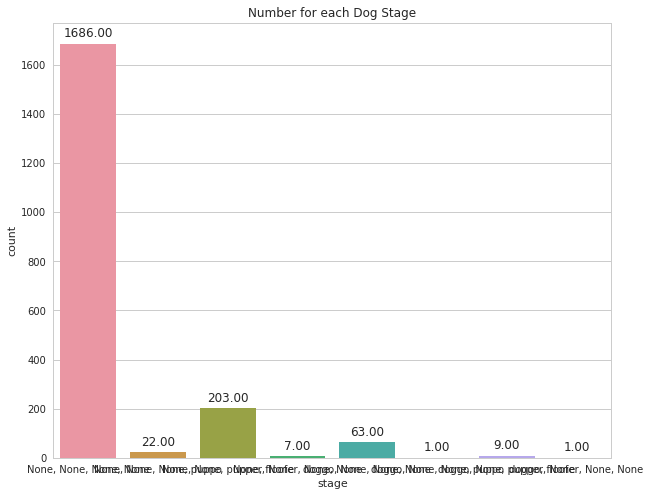

In [81]:
#https://seaborn.pydata.org/generated/seaborn.barplot.html

sns.set(style="whitegrid")
tips = wrangled_df.groupby("stage").size().to_frame(name = 'count').reset_index()
plt.figure(figsize=(10,8))
plt.title('Number for each Dog Stage')

ax = sns.barplot(x="stage", y="count", data=tips)
#plt.yticks(np.arange(0,1750,step=50))
#https://github.com/mwaskom/seaborn/issues/1582
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()